# Imports

In [6]:
# numpy and pandas
import pandas as pd
import numpy as np

# matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [7]:
# Function importing Dataset 

def importdata():
    url = (
        'https://archive.ics.uci.edu/ml/machine-learning-'+
        'databases/balance-scale/balance-scale.data'
    )
    data = pd.read_csv(url, sep=',', header=None)
    return data

In [8]:
importdata()
data=importdata()

In [9]:
data.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [10]:
data[0].value_counts()

R    288
L    288
B     49
Name: 0, dtype: int64

In [11]:
# Function to split the dataset 
def splitdataset(balance_data): 
    # Seperating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0] 
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        Y,
        test_size=.3,
        random_state=25
    ) 
    return X, Y, X_train, X_test, y_train, y_test

In [12]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(
        criterion='gini', 
        random_state=100,
        max_depth=3,
        min_samples_leaf=1
    ) 
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [13]:
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
    # Decision tree with entropy 
    clf_entropy=DecisionTreeClassifier(
        criterion='entropy',
        random_state=100, 
        max_depth=3,
        min_samples_leaf=5
    ) 
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [14]:
# Function to make predictions 
def prediction(X_test, clf_object): 
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [15]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
    print(
        'Confusion Matrix: ',
        confusion_matrix(y_test, y_pred)
    ) 
    print(
        'Accuracy (%): ',
        accuracy_score(y_test,y_pred)*100
    )
    print(
        'Report: ',
        classification_report(y_test, y_pred)
    )

In [16]:
data = importdata() 
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

[Text(161.42142857142858, 199.32, 'X[2] <= 2.5\ngini = 0.569\nsamples = 437\nvalue = [34, 203, 200]'),
 Text(82.20535714285714, 163.07999999999998, 'X[0] <= 1.5\ngini = 0.46\nsamples = 174\nvalue = [14, 121, 39]'),
 Text(44.839285714285715, 126.83999999999999, 'X[3] <= 2.5\ngini = 0.542\nsamples = 34\nvalue = [3, 11, 20]'),
 Text(23.914285714285715, 90.6, 'X[1] <= 1.5\ngini = 0.462\nsamples = 13\nvalue = [1, 9, 3]'),
 Text(11.957142857142857, 54.359999999999985, 'X[2] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(5.978571428571429, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(17.935714285714287, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(35.871428571428574, 54.359999999999985, 'X[2] <= 1.5\ngini = 0.298\nsamples = 11\nvalue = [0, 9, 2]'),
 Text(29.892857142857142, 18.119999999999976, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(41.85, 18.119999999999976, 'gini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text

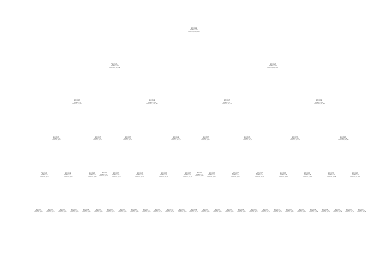

In [22]:
clf_gini = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=25,
    min_samples_leaf=1,
)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
#print(classification_report(y_test, y_pred))
#confusion_matrix(y_test, y_pred)

plot_tree(clf_gini)

In [ ]:
print(clf_gini.tree_)

In [18]:
x1 = data.iloc[:,1]
x2 = data.iloc[:,2]

In [19]:
# Driver code 
def main(): 
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
    # Operational Phase 
    print('Results Using Gini Index:') 
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
    print('\n\n\n\n')
    print('Results Using Entropy:') 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy)

In [20]:
# Calling main function 
if __name__=='__main__': 
    main() 

Results Using Gini Index:
Predicted values:
['R' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R'
 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'L'
 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'R'
 'L' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L'
 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'L'
 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R'
 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R'
 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'R']
Confusion Matrix:  [[ 0  6  9]
 [ 0 53 32]
 [ 0 11 77]]
Accuracy (%):  69.14893617021278
Report:                precision    recall  f1-score   support

           B       0.00      0.00      

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',